# Title: Topology-Enhanced Nonreciprocal Scattering and Photon Absorption in a Waveguide——PRApplied 15,044041

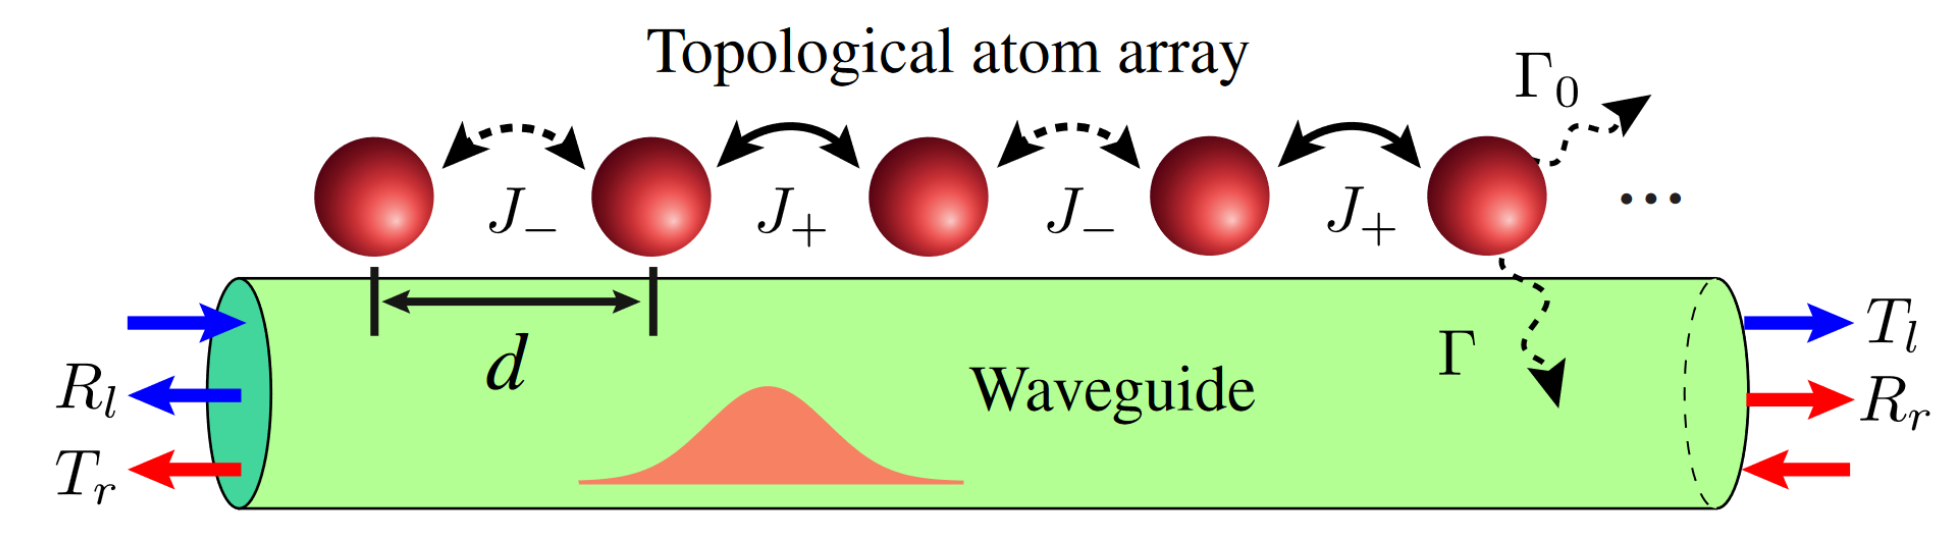

## The effective Hamiltonian

$$H_{\text{eff}}=H_{\text{SSH}}+H^\prime_{\text{en}}+H^\prime_{\text{wg}},$$
where
\begin{align*}
H_{\text{SSH}}&=\left(J_-\sum_{j=\text{odd}}\sigma_j^\dagger\sigma_{j+1}+J_+\sum_{j=\text{even}}\sigma_j^\dagger\sigma_{j}\right)+\text{H.c.}\\
H_{\text{en}}^\prime&=-i\Gamma_{0}\sum_{j}\sigma_j^\dagger\sigma_j\\
H_{\text{wg}}^\prime&=-i\Gamma\sum_{j,k}e^{ik_0|x_j-x_k|}\sigma_j^\dagger\sigma_k
\end{align*}
Here, $J_{\pm}=J_0(1\pm\cos\varphi)$. We set $k_0=1$, and thus $\lambda_0=2\pi$.

## The Input-Output formalism of waveguide modes
\begin{align*}
b_{r,\text{out}}&=b_{r,\text{in}}-i\sum_{k=1}^{N}\exp(-ik_0x_k)\sqrt{\Gamma_{k,r}}\sigma_k,\\
b_{l,\text{out}}&=b_{l,\text{in}}-i\sum_{k=1}^{N}\exp(+ik_0x_k)\sqrt{\Gamma_{k,l}}\sigma_k,
\end{align*}
where $\Gamma_{k,\mu}=\Gamma, \forall \mu\in\{l,r\}$.

### Figure 1.(d) and (e)
$$N=11,J_0=8\Gamma,\varphi=0.3\pi,\Gamma_0=0.05\Gamma$$

In [1]:
from qcs_phy import qcs

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# system parameters
N = 11
Γ = 1
Γ0 = 0.05*Γ
J0 = 8*Γ
φ=0.3*np.pi
Jp = J0*(1+np.cos(φ))
Jm = J0*(1-np.cos(φ))

δω = np.linspace(-40, 40, 4000)

locs = list(range(N))

#### Figure 1.(d)

In [13]:
d_list = np.linspace(0, 2*np.pi, 2000)
Elist = np.zeros((2000, 11))
for pp, d in enumerate(d_list):
    # construct Input and Output channels
    mode_br = [[np.sqrt(Γ)*np.exp(-1j*locs[k]*d), ("sm", k)] for k in range(N)]
    Input = qcs.Input_channel("br", mode_br, 0)
    Output = qcs.Output_channel("br", mode_br)
    # construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
    Heff = []
    for k in range(N):
        Heff.append([-1j*Γ0, ("sp", k), ("sm", k)])
        if k != N-1:
            if k%2 == 0:
                Heff.append([Jm, ("sp", k), ("sm", k+1)])
                Heff.append([Jm, ("sm", k), ("sp", k+1)])
            else:
                Heff.append([Jp, ("sp", k), ("sm", k+1)])
                Heff.append([Jp, ("sm", k), ("sp", k+1)])
        for l in range(N):
            Heff.append([-1j*Γ*np.exp(1j*d*np.abs(locs[k]-locs[l])), ("sp", k), ("sm", l)])
    result = qcs(Heff, Input, Output)
    Heff = result.print_Heff(1, 0)
    lm, _ = np.linalg.eig(Heff)
    Elist[pp, :] = np.sort(np.real(lm))

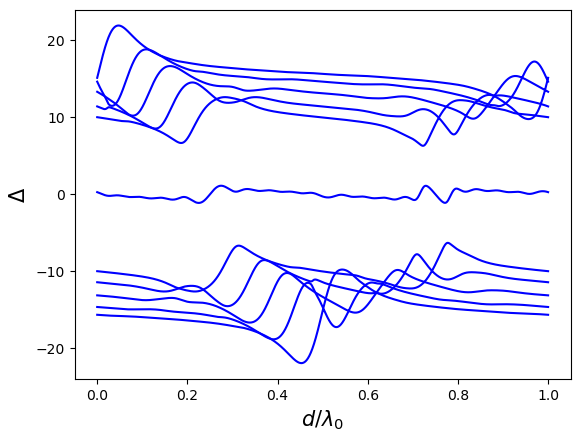

In [17]:
plt.plot(d_list/(2*np.pi), Elist, 'b')
plt.xlabel(r'$d/\lambda_0$', fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel('$\Delta$', fontdict={"family": "Times New Roman", "size": 15})
plt.ylim([-3*J0,3*J0])
plt.show()

#### Figure 1.(d)

In [19]:
d_list = [2*np.pi/4, 2*np.pi/2, 2*np.pi*3/4]
T_list = []
for d in d_list:
    # construct Input and Output channels
    mode_br = [[np.sqrt(Γ)*np.exp(-1j*locs[k]*d), ("sm", k)] for k in range(N)]
    Input = qcs.Input_channel("br", mode_br, δω)
    Output = qcs.Output_channel("br", mode_br)
    # construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
    Heff = []
    for k in range(N):
        Heff.append([-1j*Γ0, ("sp", k), ("sm", k)])
        if k != N-1:
            if k%2 == 0:
                Heff.append([Jm, ("sp", k), ("sm", k+1)])
                Heff.append([Jm, ("sm", k), ("sp", k+1)])
            else:
                Heff.append([Jp, ("sp", k), ("sm", k+1)])
                Heff.append([Jp, ("sm", k), ("sp", k+1)])
        for l in range(N):
            Heff.append([-1j*Γ*np.exp(1j*d*np.abs(locs[k]-locs[l])), ("sp", k), ("sm", l)])
    result = qcs(Heff, Input, Output)
    T = result.calculate_quantity("br")
    T_list.append(T)

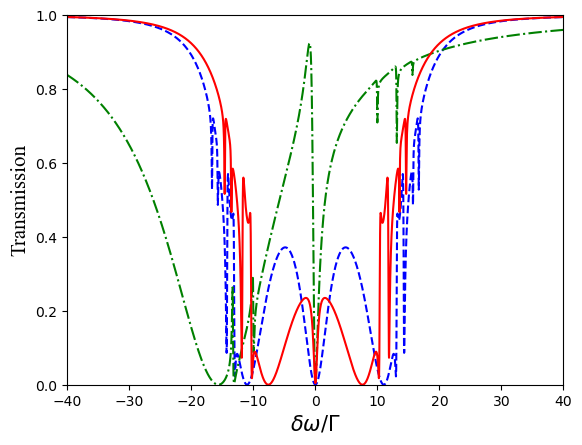

In [20]:
color = ['b', 'g', 'r']
lines = ['--', '-.', '-']
for kk, T in enumerate(T_list):
    plt.plot(δω, T, color=color[kk], linestyle=lines[kk])
plt.xlabel(r'$\delta\omega/\Gamma$', fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel('Transmission', fontdict={"family": "Times New Roman", "size": 15})
plt.ylim([0, 1])
plt.xlim([-40,40])
plt.show()

### Figure 3
$$N=11,\varphi=0.3\pi$$

#### Figure 3.(a)
$$\Gamma_0=0.05\Gamma,J_0=8\Gamma,d=3\lambda_0/4$$

In [21]:
# system parameters
N = 11
Γ = 1
Γ0 = 0.05*Γ
J0 = 8*Γ
φ=0.3*np.pi
Jp = J0*(1+np.cos(φ))
Jm = J0*(1-np.cos(φ))

d = 2*np.pi*3/4
locs = list(range(N))
δω = np.linspace(-20, 20, 4000)

In [36]:
# construct Input and Output channels
mode_br = [[np.sqrt(Γ)*np.exp(-1j*locs[k]*d), ("sm", k)] for k in range(N)]
mode_bl = [[np.sqrt(Γ)*np.exp(1j*locs[k]*d), ("sm", k)] for k in range(N)]
Input = qcs.Input_channel("br", mode_br, δω)
Output1 = qcs.Output_channel("br", mode_br)
Output2 = qcs.Output_channel("bl", mode_bl)
Output = [Output1, Output2]
# construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
Heff = []
for k in range(N):
    Heff.append([-1j*Γ0, ("sp", k), ("sm", k)])
    if k != N-1:
        if k%2 == 0:
            Heff.append([Jm, ("sp", k), ("sm", k+1)])
            Heff.append([Jm, ("sm", k), ("sp", k+1)])
        else:
            Heff.append([Jp, ("sp", k), ("sm", k+1)])
            Heff.append([Jp, ("sm", k), ("sp", k+1)])
    for l in range(N):
        Heff.append([-1j*Γ*np.exp(1j*d*np.abs(locs[k]-locs[l])), ("sp", k), ("sm", l)])
result = qcs(Heff, Input, Output)
T_l = result.calculate_quantity("br")
R_l = result.calculate_quantity("bl")

In [37]:
# construct Input and Output channels
mode_br = [[np.sqrt(Γ)*np.exp(-1j*locs[k]*d), ("sm", k)] for k in range(N)]
mode_bl = [[np.sqrt(Γ)*np.exp(1j*locs[k]*d), ("sm", k)] for k in range(N)]
Input = qcs.Input_channel("bl", mode_bl, δω)
Output1 = qcs.Output_channel("br", mode_br)
Output2 = qcs.Output_channel("bl", mode_bl)
Output = [Output1, Output2]
# construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
Heff = []
for k in range(N):
    Heff.append([-1j*Γ0, ("sp", k), ("sm", k)])
    if k != N-1:
        if k%2 == 0:
            Heff.append([Jm, ("sp", k), ("sm", k+1)])
            Heff.append([Jm, ("sm", k), ("sp", k+1)])
        else:
            Heff.append([Jp, ("sp", k), ("sm", k+1)])
            Heff.append([Jp, ("sm", k), ("sp", k+1)])
    for l in range(N):
        Heff.append([-1j*Γ*np.exp(1j*d*np.abs(locs[k]-locs[l])), ("sp", k), ("sm", l)])
result = qcs(Heff, Input, Output)
R_r = result.calculate_quantity("br")
T_r = result.calculate_quantity("bl")

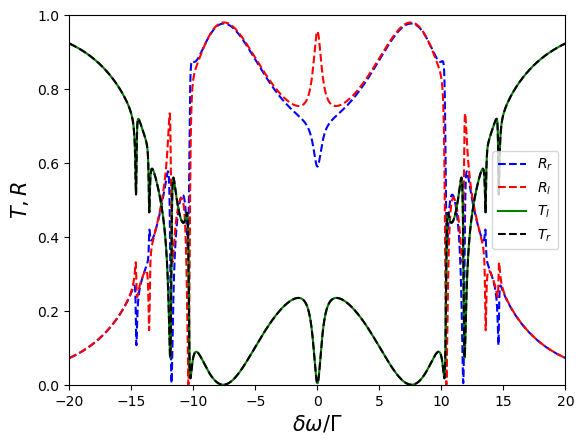

In [58]:
plt.plot(δω, R_r, color='blue',linestyle= '--',label="$R_r$")
plt.plot(δω, R_l, color='red',linestyle= '--',label="$R_l$")
plt.plot(δω, T_l, color='green',label="$T_l$")
plt.plot(δω, T_r, color='k',linestyle= '--',label="$T_r$")
plt.ylim([0, 1])
plt.xlim([-20,20])
plt.xlabel(r'$\delta\omega/\Gamma$', fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel('$T,R$', fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

#### Figure 3.(b)
$$\Gamma_0=0.05\Gamma$$

In [87]:
# system parameters
N = 11
Γ = 1
Γ0 = 0.05*Γ
δω = 0
φ=0.3*np.pi

locs = list(range(N))
J0_list = np.linspace(0, 8, 1000)
d_list = np.linspace(0, 2*np.pi, 1000)

In [88]:
DR = np.zeros((1000,1000))
for tt, J0 in enumerate(J0_list):
    for pp, d in enumerate(d_list):
        Jp = J0*(1+np.cos(φ))
        Jm = J0*(1-np.cos(φ))
        # construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
        Heff = []
        for k in range(N):
            Heff.append([-1j*Γ0, ("sp", k), ("sm", k)])
            if k != N-1:
                if k%2 == 0:
                    Heff.append([Jm, ("sp", k), ("sm", k+1)])
                    Heff.append([Jm, ("sm", k), ("sp", k+1)])
                else:
                    Heff.append([Jp, ("sp", k), ("sm", k+1)])
                    Heff.append([Jp, ("sm", k), ("sp", k+1)])
            for l in range(N):
                Heff.append([-1j*Γ*np.exp(1j*d*np.abs(locs[k]-locs[l])), ("sp", k), ("sm", l)])
        # construct Input and Output channels
        mode_br = [[np.sqrt(Γ)*np.exp(-1j*locs[k]*d), ("sm", k)] for k in range(N)]
        mode_bl = [[np.sqrt(Γ)*np.exp(1j*locs[k]*d), ("sm", k)] for k in range(N)]
        Input = qcs.Input_channel("br", mode_br, δω)
        Output = qcs.Output_channel("bl", mode_bl)
        result1 = qcs(Heff, Input, Output)
        R_l = result1.calculate_quantity("bl")
        # construct Input and Output channels
        Input = qcs.Input_channel("bl", mode_bl, δω)
        Output = qcs.Output_channel("br", mode_br)
        result2 = qcs(Heff, Input, Output)
        R_r = result2.calculate_quantity("br")
        DR[tt, pp] = np.abs(R_r-R_l)

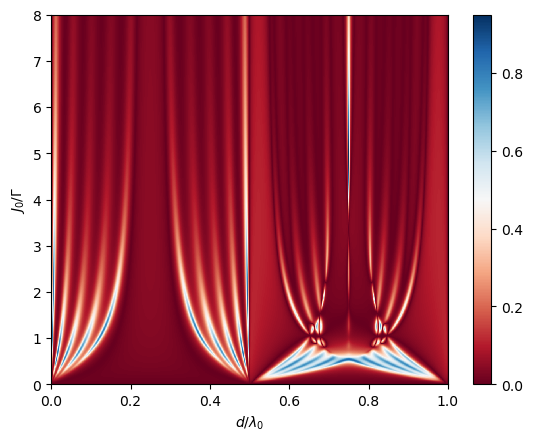

In [98]:
extent = np.min(d_list/(2*np.pi)), np.max(d_list/(2*np.pi)),np.min(J0_list), np.max(J0_list)
plt.imshow(DR,cmap='RdBu', interpolation='nearest',origin="lower",extent=extent,aspect='auto')
plt.colorbar()
plt.xlabel("$d/\lambda_0$")
plt.ylabel(r"$J_0/\Gamma$")
plt.show()

#### Figure 3.(c)
$$J_0=8\Gamma$$

In [83]:
# system parameters
N = 11
Γ = 1
J0 = 8*Γ
δω = 0
φ=0.3*np.pi
Jp = J0*(1+np.cos(φ))
Jm = J0*(1-np.cos(φ))

locs = list(range(N))
Γ0_list = np.linspace(0, 5, 2000)

In [84]:
d_list = [2*np.pi/4,2*np.pi*3/4]
R_l_list = []
R_r_list = []
for d in d_list:
    R_l = []
    R_r = []
    for kk, Γ0 in enumerate(Γ0_list):
        # construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
        Heff = []
        for k in range(N):
            Heff.append([-1j*Γ0, ("sp", k), ("sm", k)])
            if k != N-1:
                if k%2 == 0:
                    Heff.append([Jm, ("sp", k), ("sm", k+1)])
                    Heff.append([Jm, ("sm", k), ("sp", k+1)])
                else:
                    Heff.append([Jp, ("sp", k), ("sm", k+1)])
                    Heff.append([Jp, ("sm", k), ("sp", k+1)])
            for l in range(N):
                Heff.append([-1j*Γ*np.exp(1j*d*np.abs(locs[k]-locs[l])), ("sp", k), ("sm", l)])

        # construct Input and Output channels
        mode_br = [[np.sqrt(Γ)*np.exp(-1j*locs[k]*d), ("sm", k)] for k in range(N)]
        mode_bl = [[np.sqrt(Γ)*np.exp(1j*locs[k]*d), ("sm", k)] for k in range(N)]
        Input = qcs.Input_channel("br", mode_br, δω)
        Output = qcs.Output_channel("bl", mode_bl)
        result1 = qcs(Heff, Input, Output)
        R_l.append(result1.calculate_quantity("bl"))
        # construct Input and Output channels
        Input = qcs.Input_channel("bl", mode_bl, δω)
        Output = qcs.Output_channel("br", mode_br)
        result2 = qcs(Heff, Input, Output)
        R_r.append(result2.calculate_quantity("br"))
    R_l_list.append(R_l)
    R_r_list.append(R_r)

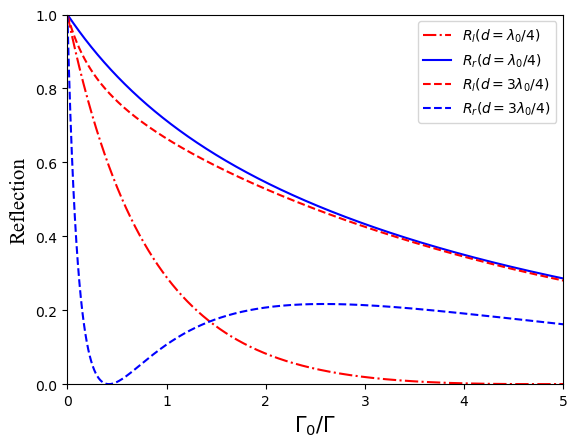

In [86]:
plt.plot(Γ0_list, R_l_list[0], color='r', linestyle='-.', label=r'$R_l(d=\lambda_0/4)$')
plt.plot(Γ0_list, R_r_list[0], color='b', linestyle='-', label=r'$R_r(d=\lambda_0/4)$')
plt.plot(Γ0_list, R_l_list[1], color='r', linestyle='--', label=r'$R_l(d=3\lambda_0/4)$')
plt.plot(Γ0_list, R_r_list[1], color='b', linestyle='--', label=r'$R_r(d=3\lambda_0/4)$')
plt.xlabel(r'$\Gamma_0/\Gamma$', fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel('Reflection', fontdict={"family": "Times New Roman", "size": 15})
plt.ylim([0, 1])
plt.xlim([0, 5])
plt.legend()
plt.show()

For the single-photon transmission and reflection, I suggest user do't use this code when we calculate figure 3.(b).